In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
from matplotlib.dates import date2num, MinuteLocator, DateFormatter
def datetime_converter(date_string):
    return date2num(dt.datetime.strptime(date_string, '%d-%m-%Y'))


Saving campaign_data.csv to campaign_data.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['campaign_data.csv']))
df

,Date,NewActivePassengers,Tours,NewUserRegistrations,AppDownloads
0,5/10/2015,2529,20886,3810,3975
1,6/10/2015,2226,21045,3690,4110
2,7/10/2015,2355,22455,3927,4188
3,8/10/2015,2922,24504,5043,5433
4,9/10/2015,5202,29562,8493,9609
...,...,...,...,...,...
59,3/12/2015,4557,28059,10962,4053
60,4/12/2015,8262,36693,13935,15240
61,5/12/2015,11367,32583,18327,19362
62,6/12/2015,7614,22539,11028,10602


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  64 non-null     object
 1   NewActivePassengers   64 non-null     int64 
 2   Tours                 64 non-null     int64 
 3   NewUserRegistrations  64 non-null     int64 
 4   AppDownloads          64 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


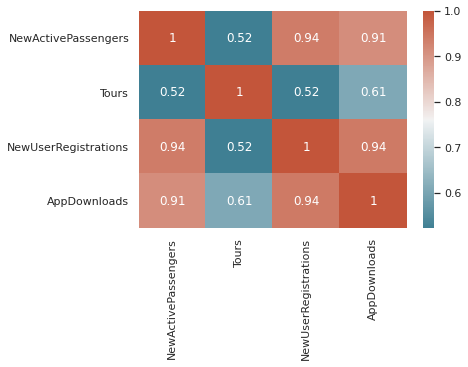

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [9]:
df.corr()

,NewActivePassengers,Tours,NewUserRegistrations,AppDownloads
NewActivePassengers,1.000000,0.523632,0.940238,0.913738
Tours,0.523632,1.000000,0.522353,0.609719
NewUserRegistrations,0.940238,0.522353,1.000000,0.942485
AppDownloads,0.913738,0.609719,0.942485,1.000000


There is a strong correlation between dowloads, user registrations and user activations (.93), with only a moderate correlation between activations and tours (.54)

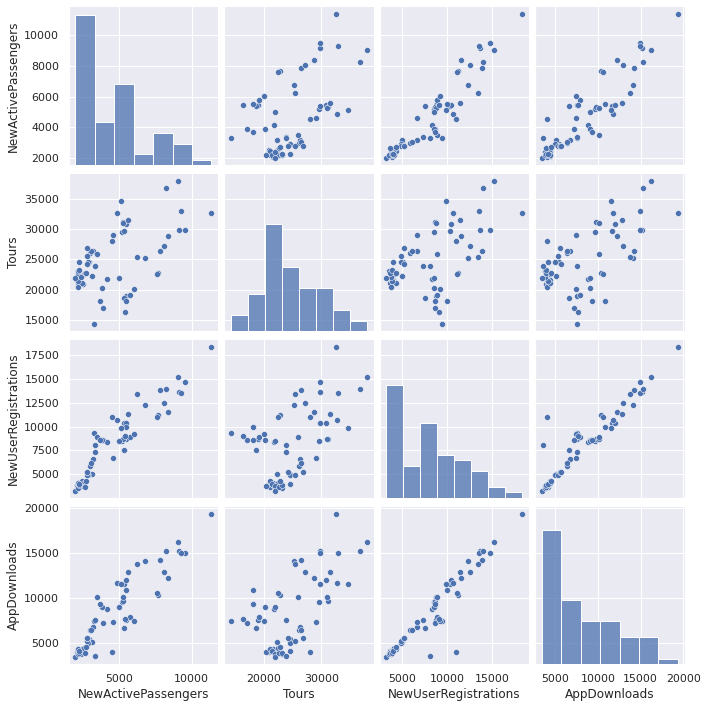

In [10]:
sns.pairplot(df)

In [11]:
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  64 non-null     datetime64[ns]
 1   NewActivePassengers   64 non-null     int64         
 2   Tours                 64 non-null     int64         
 3   NewUserRegistrations  64 non-null     int64         
 4   AppDownloads          64 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.6 KB


In [12]:
df.head()

,Date,NewActivePassengers,Tours,NewUserRegistrations,AppDownloads
0,2015-10-05,2529,20886,3810,3975
1,2015-10-06,2226,21045,3690,4110
2,2015-10-07,2355,22455,3927,4188
3,2015-10-08,2922,24504,5043,5433
4,2015-10-09,5202,29562,8493,9609


NameError: ignored

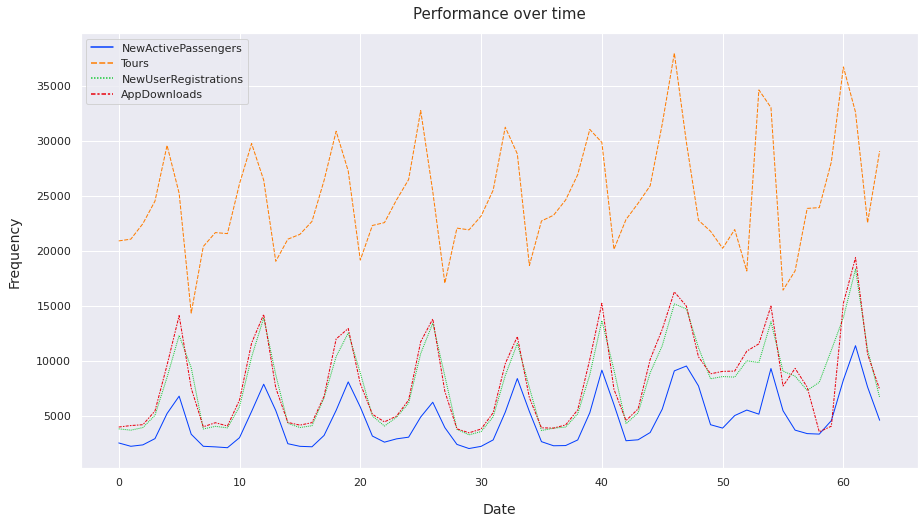

In [13]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))

s = sns.lineplot(data=df,  linewidth=1, palette='bright')
s.set_title('Performance over time', y=1.02, fontsize=15)
s.set_xlabel('Date', fontsize=14, labelpad=15)
s.set_ylabel('Frequency', fontsize=14, labelpad=15)
plt.axvline(dt.datetime(2015,11,17), color='r', linewidth=1, linestyle='--')
plt.show()


Where behavior was stable before, we can see visible changes and lift in downloads, new user activations, and new active passengers during the period of the campaign. Tours remained relatively the same with slight spikes.

NameError: ignored

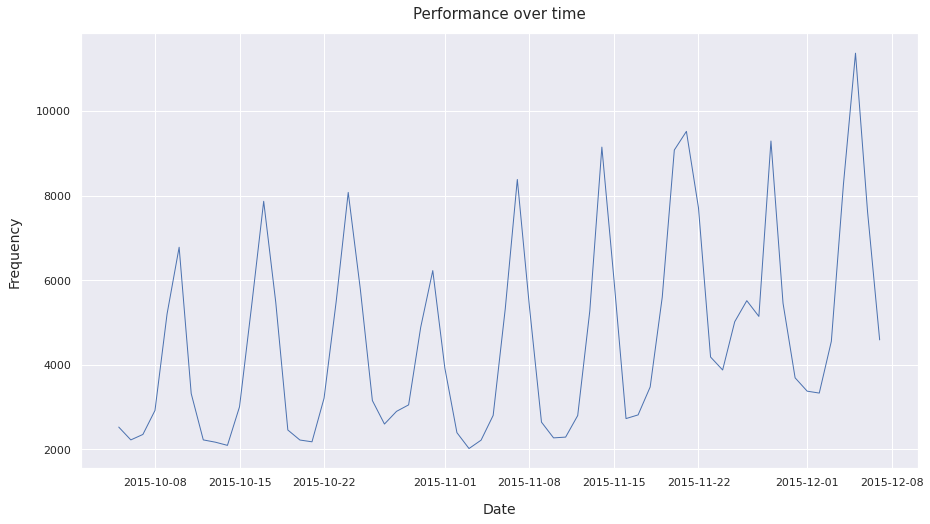

In [15]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))

s = sns.lineplot(data=df, x='Date', y= 'NewActivePassengers', linewidth=1, palette='bright')
s.set_title('Performance over time', y=1.02, fontsize=15)
s.set_xlabel('Date', fontsize=14, labelpad=15)
s.set_ylabel('Frequency', fontsize=14, labelpad=15)
plt.axvline(dt.datetime(2015,11,17), color='r', linewidth=1, linestyle='--')
plt.show()


NameError: ignored

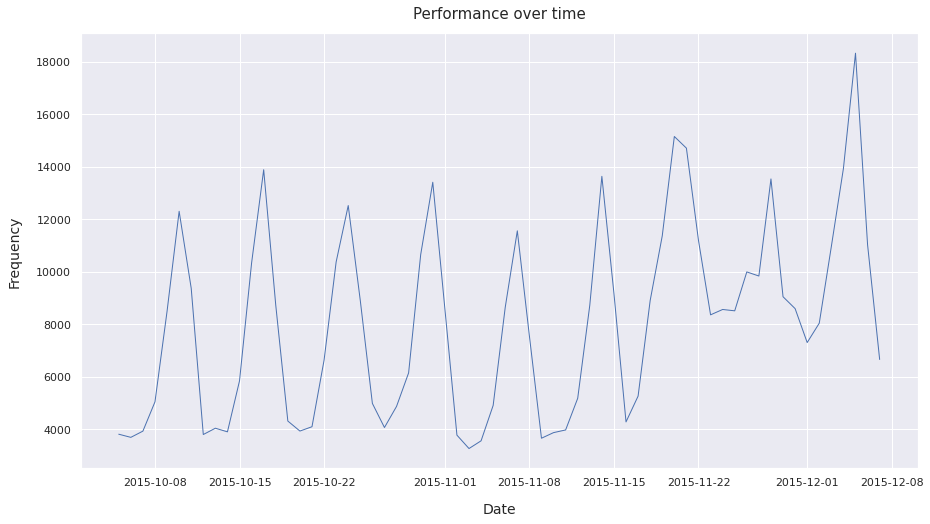

In [14]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))

s = sns.lineplot(data=df, x='Date', y= 'NewUserRegistrations', linewidth=1, palette='bright')
s.set_title('Performance over time', y=1.02, fontsize=15)
s.set_xlabel('Date', fontsize=14, labelpad=15)
s.set_ylabel('Frequency', fontsize=14, labelpad=15)
plt.axvline(dt.datetime(2015,11,17), color='r', linewidth=1, linestyle='--')
plt.show()


NameError: ignored

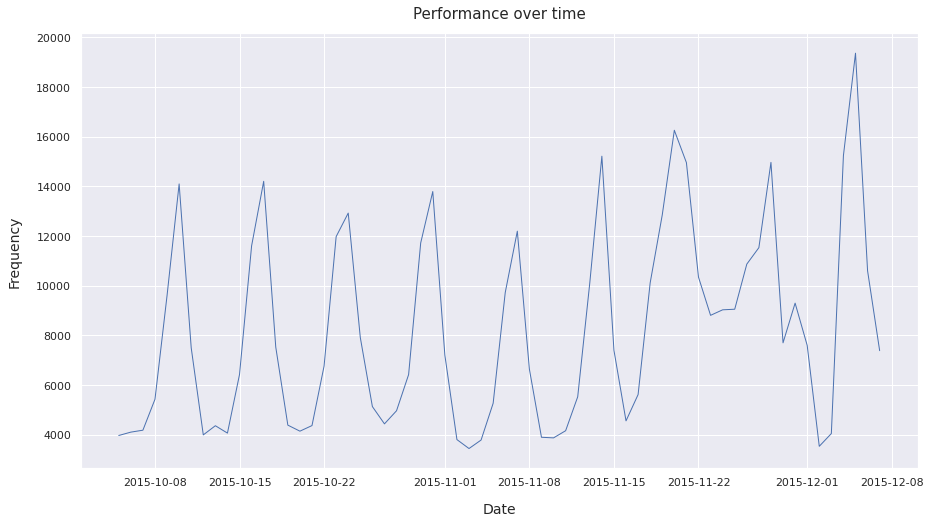

In [16]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))

s = sns.lineplot(data=df, x='Date', y= 'AppDownloads', linewidth=1, palette='bright')
s.set_title('Performance over time', y=1.02, fontsize=15)
s.set_xlabel('Date', fontsize=14, labelpad=15)
s.set_ylabel('Frequency', fontsize=14, labelpad=15)
plt.axvline(dt.datetime(2015,11,17), color='r', linewidth=1, linestyle='--')
plt.show()


In [12]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects import Formula
import rpy2.robjects.packages as rpackages
import rpy2.robjects.vectors as StrVector
from rpy2.ipython.ggplot import image_png
from statsmodels.tsa.arima_process import ArmaProcess


In [13]:
#Set pre and post intervention periods
pre_period = [0, 44]
post_period = [45, 65]
#R conversion
pre_period=robjects.FloatVector(pre_period)
post_period=robjects.FloatVector(post_period)

In [14]:
#Load R libraries from within Python - R interface
utils=rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
packnames=('CausalImpact','bsts') 
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
from rpy2.robjects.vectors import StrVector
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘Boom’, ‘zoo’, ‘BoomSpikeSlab’, ‘xts’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/Boom_0.9.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2199003 bytes (2.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

## **Causal effect of campaign on downloads**

In [29]:

robjects.numpy2ri.activate()
pandas2ri.activate()
rdf=robjects.conversion.py2rpy(df['AppDownloads'])
causalimpact=importr('CausalImpact')
impact=causalimpact.CausalImpact(rdf,pre_period,post_period)
summary_func=robjects.r('function(x) summary(x)')
summary_func(impact)
#Summary with descriptive report
summary_report_func=robjects.r('function(x) summary(x,"report")')
summary_report_func(impact)
#Create causality plot
img_file='causalimpact_downloads.png'
rstr="""
library(ggplot2)
function(x,y){
p<-plot(x)
ggsave(y,plot=p)
}
"""
rfunc=robjects.r(rstr)
rfunc(impact,img_file)

Posterior inference {CausalImpact}

                         Average        Cumulative      
Actual                   10680          213609          
Prediction (s.d.)        7083 (949)     141653 (18979)  
95% CI                   [5224, 8911]   [104472, 178220]
                                                        
Absolute effect (s.d.)   3598 (949)     71956 (18979)   
95% CI                   [1769, 5457]   [35389, 109137] 
                                                        
Relative effect (s.d.)   51% (13%)      51% (13%)       
95% CI                   [25%, 77%]     [25%, 77%]      

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8995%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 10.68K. By contrast, in the absence of an intervention, we would have expected an average response of 7.08K. The 95% interval 

R[write to console]: Saving 7 x 7 in image



<rpy2.rinterface_lib.sexp.NULLType object at 0x7fa6825b7be0> [RTYPES.NILSXP]

## **Causal effect of campaign on Activations**



In [ ]:
robjects.numpy2ri.activate()
pandas2ri.activate()
rdf=robjects.conversion.py2rpy(df['NewActivePassengers'])
causalimpact=importr('CausalImpact')
impact=causalimpact.CausalImpact(rdf,pre_period,post_period)
summary_func=robjects.r('function(x) summary(x)')
summary_func(impact)
#Summary with descriptive report
summary_report_func=robjects.r('function(x) summary(x,"report")')
summary_report_func(impact)
#Create causality plot
img_file='causalimpact_nap.png'
rstr="""
library(ggplot2)
function(x,y){
p<-plot(x)
ggsave(y,plot=p)
}
"""
rfunc=robjects.r(rstr)
rfunc(impact,img_file)

Posterior inference {CausalImpact}

                         Average        Cumulative     
Actual                   6034           120672         
Prediction (s.d.)        3963 (557)     79254 (11135)  
95% CI                   [2928, 5144]   [58556, 102877]
                                                       
Absolute effect (s.d.)   2071 (557)     41418 (11135)  
95% CI                   [890, 3106]    [17795, 62116] 
                                                       
Relative effect (s.d.)   52% (14%)      52% (14%)      
95% CI                   [22%, 78%]     [22%, 78%]     

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8995%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 6.03K. By contrast, in the absence of an intervention, we would have expected an average response of 3.96K. The 95% interval of this cou

R[write to console]: Saving 7 x 7 in image



<rpy2.rinterface_lib.sexp.NULLType object at 0x7fee44a74500> [RTYPES.NILSXP]

In [15]:
robjects.numpy2ri.activate()
pandas2ri.activate()
rdf=robjects.conversion.py2rpy(df['Tours' ])
causalimpact=importr('CausalImpact')
impact=causalimpact.CausalImpact(rdf,pre_period,post_period)
summary_func=robjects.r('function(x) summary(x)')
summary_func(impact)
#Summary with descriptive report
summary_report_func=robjects.r('function(x) summary(x,"report")')
summary_report_func(impact)
#Create causality plot
img_file='causalimpact_tours.png'
rstr="""
library(ggplot2)
function(x,y){
p<-plot(x)
ggsave(y,plot=p)
}
"""
rfunc=robjects.r(rstr)
rfunc(impact,img_file)

Posterior inference {CausalImpact}

                         Average          Cumulative      
Actual                   26443            528855          
Prediction (s.d.)        24082 (1151)     481648 (23022)  
95% CI                   [21933, 26385]   [438659, 527702]
                                                          
Absolute effect (s.d.)   2360 (1151)      47207 (23022)   
95% CI                   [58, 4510]       [1153, 90196]   
                                                          
Relative effect (s.d.)   9.8% (4.8%)      9.8% (4.8%)     
95% CI                   [0.24%, 19%]     [0.24%, 19%]    

Posterior tail-area probability p:   0.02412
Posterior prob. of a causal effect:  97.588%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 26.44K. By contrast, in the absence of an intervention, we would have expected an average response of 24.08

R[write to console]: Saving 7 x 7 in image



<rpy2.rinterface_lib.sexp.NULLType object at 0x7fc2dacc4280> [RTYPES.NILSXP]

In [25]:
spend = 1000000
users = df['NewActivePassengers'].sum()
CPA = spend/users
print("CPA: %.2fEUR" % (CPA))

CPA: 3.39EUR


In [38]:
spend = 1000000
act_new = (df['NewActivePassengers'].sum()-41418)
orig_CPA = spend/act_new
print("CPA without intervention: %.2fEUR" % (orig_CPA))

CPA without intervention: 3.94EUR
